<a href="https://colab.research.google.com/github/PerawitDeawpanich/CN334-Template-Perawit/blob/master/SF251_In_Class_Exercise_5(easy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Exercise 5

Once done, upload to MS Teams

## Pokemon Dataset Part 5

Data from https://www.kaggle.com/datasets/cristobalmitchell/pokedex

In [1]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv

--2026-02-24 22:28:12--  https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331632 (324K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>] 323.86K  --.-KB/s    in 0.04s   

2026-02-24 22:28:12 (8.06 MB/s) - ‘pokemon.csv’ saved [331632/331632]



In [2]:
import re
import pandas as pd
from plotnine import *

In [3]:
#Load the data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,national_number,gen,english_name,japanese_name,primary_type,secondary_type,classification,percent_male,percent_female,height_m,...,evochain_1,evochain_2,evochain_3,evochain_4,evochain_5,evochain_6,gigantamax,mega_evolution,mega_evolution_alt,description
0,1,I,Bulbasaur,Fushigidane,grass,poison,Seed Pokémon,88.14,11.86,0.7,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,There is a plant seed on its back right from t...
1,2,I,Ivysaur,Fushigisou,grass,poison,Seed Pokémon,88.14,11.86,1.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,"When the bulb on its back grows large, it appe..."
2,3,I,Venusaur,Fushigibana,grass,poison,Seed Pokémon,88.14,11.86,2.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,Gigantamax Venusaur,Mega Venusaur,NaN,Its plant blooms when it is absorbing solar en...
3,4,I,Charmander,Hitokage,fire,NaN,Lizard Pokémon,88.14,11.86,0.6,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,It has a preference for hot things. When it ra...
4,5,I,Charmeleon,Lizardo,fire,NaN,Flame Pokémon,88.14,11.86,1.1,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,"It has a barbaric nature. In battle, it whips ..."


Regex helper function

In [4]:
# function to check your regex
def test_regex(pattern, test_cases, expected_results):
    print(f"Testing pattern: {pattern}")
    for i, (test, expected) in enumerate(zip(test_cases, expected_results), 1):
        result = bool(re.fullmatch(pattern, test))
        match_text = 'matches' if result else 'does not match'
        print(f"Test {i}: {'✓' if result == expected else '✗'} - '{test}' {match_text}")

**Q1**: Regex:

Write a regex to match strings containing only binary digits (0s and 1s)

Match: 101, 11100, 001

Not match: 123, 1a0, 201

In [5]:
pattern_1 = r"..."  # Fill in your regex here

## Test cases
test_cases_1 = ["101", "11100", "001", "123", "1a0", "201"]
expected_1 = [True, True, True, False, False, False]
test_regex(pattern_1, test_cases_1, expected_1)

Testing pattern: ...
Test 1: ✓ - '101' matches
Test 2: ✗ - '11100' does not match
Test 3: ✓ - '001' matches
Test 4: ✗ - '123' matches
Test 5: ✗ - '1a0' matches
Test 6: ✗ - '201' matches


**Q2**: Regex:
Write a regex to match words that begin with 'un'

Match: unhappy, unclear, unknown

Not match: happy, clear, okay

In [6]:
pattern_2 = r"^un[a-zA-Z]+$"  # Fill in your regex here

## Test cases
test_cases_2 = ["unhappy", "unclear", "unKNOWN", "happy", "clear", "okay"]
expected_2 = [True, True, True, False, False, False]
test_regex(pattern_2, test_cases_2, expected_2)

Testing pattern: ^un[a-zA-Z]+$
Test 1: ✓ - 'unhappy' matches
Test 2: ✓ - 'unclear' matches
Test 3: ✓ - 'unKNOWN' matches
Test 4: ✓ - 'happy' does not match
Test 5: ✓ - 'clear' does not match
Test 6: ✓ - 'okay' does not match


**Q3**: Description's length

Plot the distribution of the number of description' words for all pokemon

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


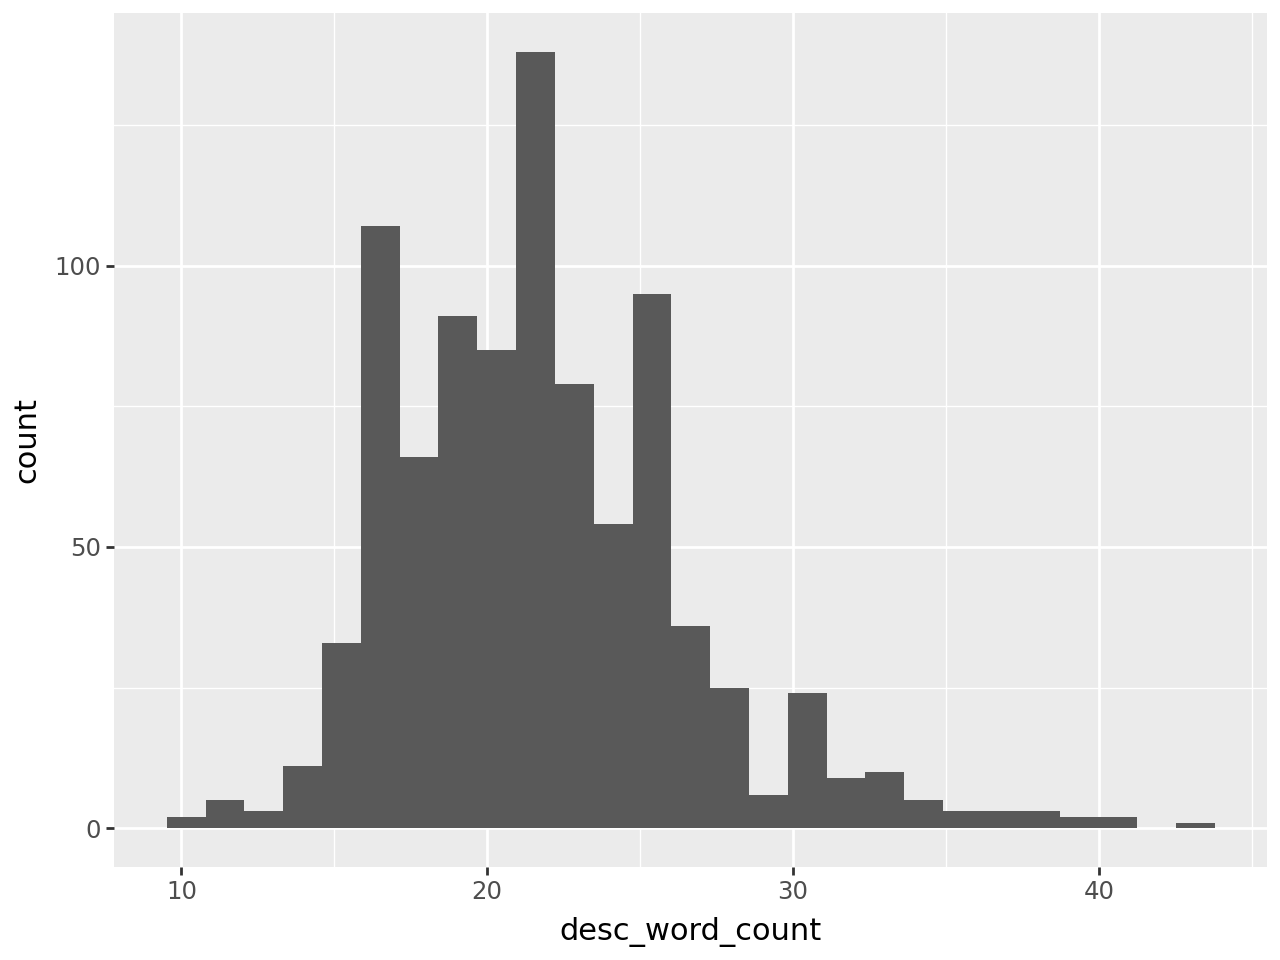

In [9]:
pokemon["desc_word_count"] = pokemon["description"].apply(
    lambda x: len(str(x).split())
)

ggplot(pokemon, aes(x="desc_word_count")) + \
    geom_histogram()


**Q4**: Create a boxplot to compare all six stats (`hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed`) between gen 1 and gen 8.

Steps:
- Filter the data to only include columns that we need.
- Melt the data so that the data looks like below.
- Then create a boxplot where x-axis is `stats`, y-axis is `value`, and color/fill is `gen`.

In [ ]:
# Melt data

,gen,stat,value
0,I,hp,45
1,I,hp,60
2,I,hp,80
3,I,hp,39
4,I,hp,58
...,...,...,...
1435,VIII,speed,200
1436,VIII,speed,80
1437,VIII,speed,30
1438,VIII,speed,130


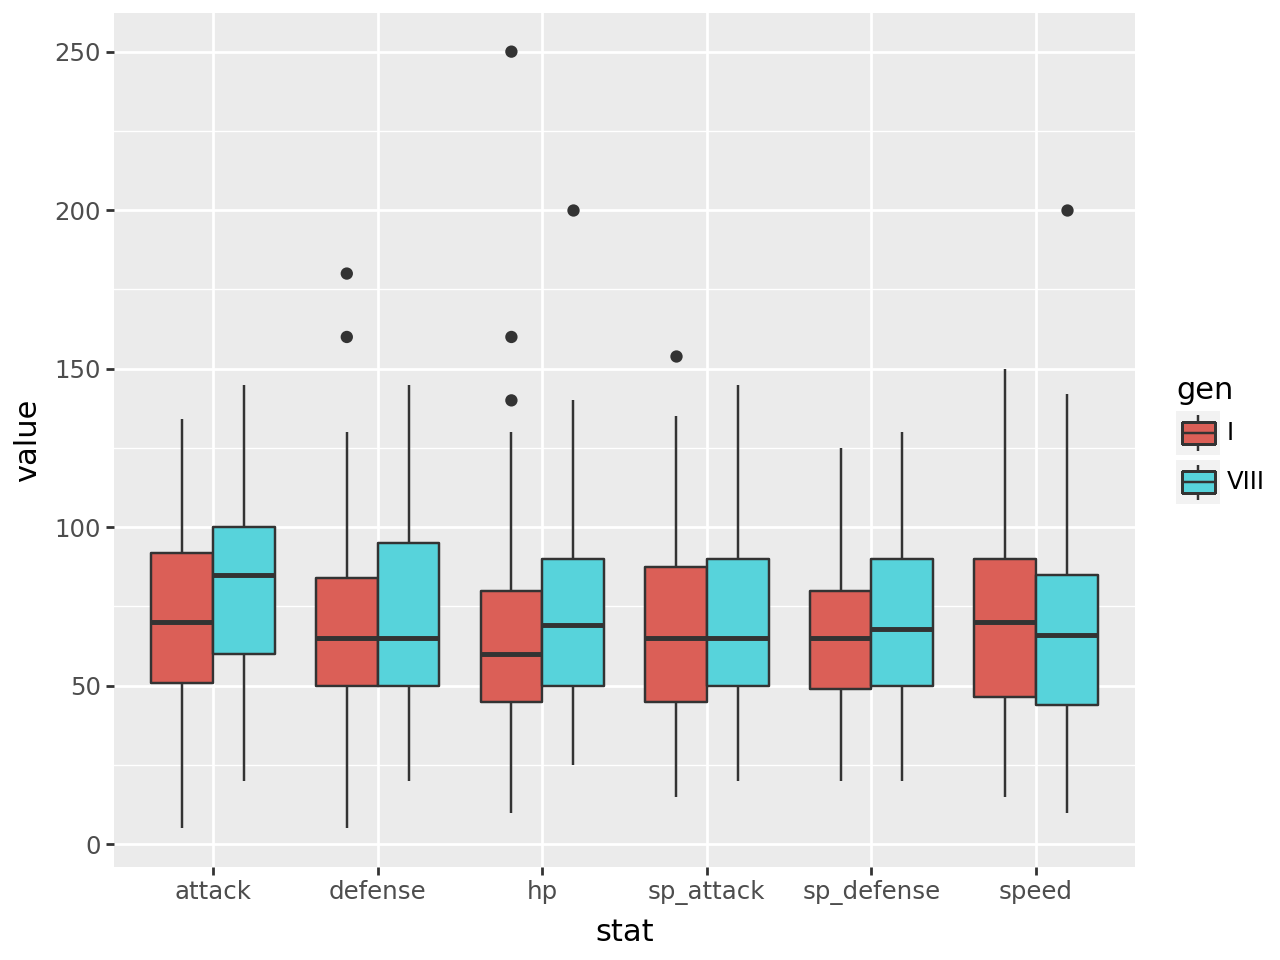

In [ ]:
# Expected Result

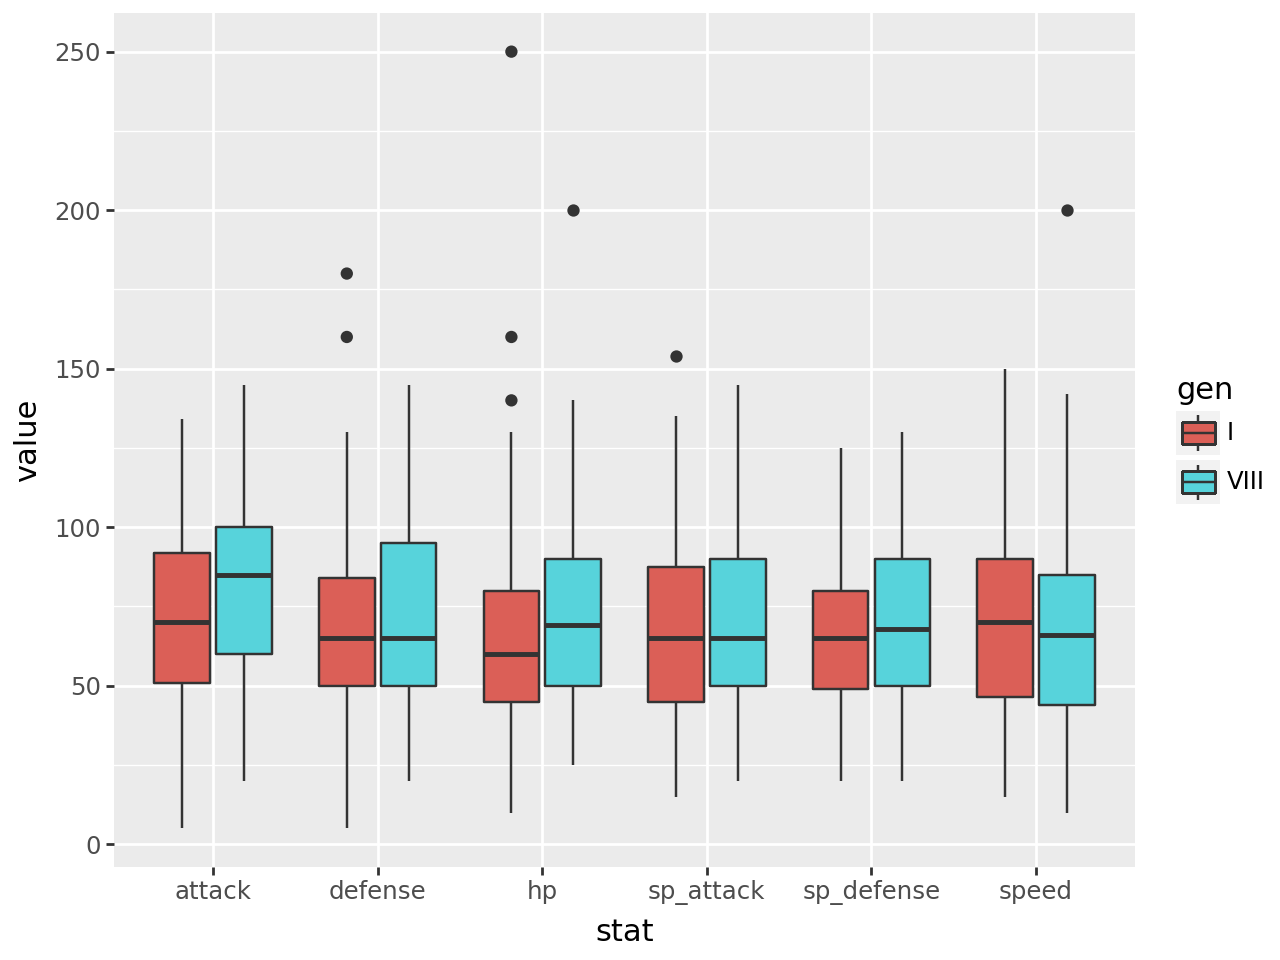

In [12]:
# Your code here
df = pokemon[pokemon["gen"].isin(["I", "VIII"])]
df = df[["gen", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]]

df_melt = df.melt(
    id_vars="gen",
    var_name="stat",
    value_name="value"
)

df_melt.head()
ggplot(df_melt, aes(x="stat", y="value", fill="gen"))+ geom_boxplot()

**Q5**: Groupby -> Barplot: Compare means of all stats (`hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed`) between gen 1 and 8

1. Create a new dataframe with means for all stats across two gens using `groupby`
2. Then plot a barplot using this new dataframe using `geom_bar(stat='identity')` and `aes(x = 'stat', y = 'value', fill = 'gen')`
3. Add `position = 'dodge'` in `geom_bar()` to make the graph easier to compare

What do you observe from the graph?

In [ ]:
# Melt data

,gen,stat,value
0,I,hp,64.211921
1,VIII,hp,71.112360
2,I,attack,72.913907
3,VIII,attack,80.078652
4,I,defense,68.225166
5,VIII,defense,72.730337
6,I,sp_attack,67.139073
7,VIII,sp_attack,71.494382
8,I,sp_defense,66.086093
9,VIII,sp_defense,69.191011


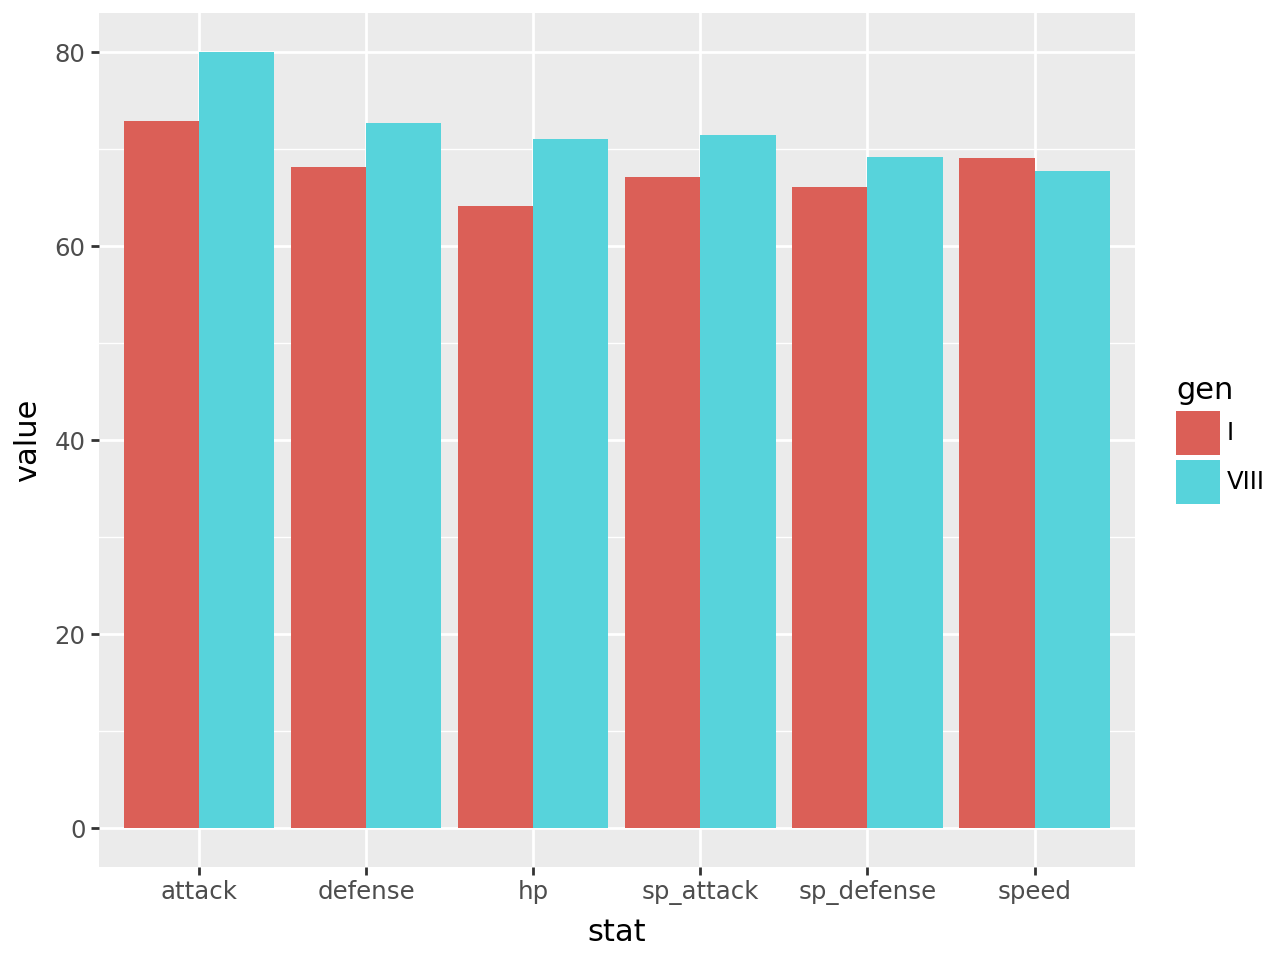

In [ ]:
# Expected result

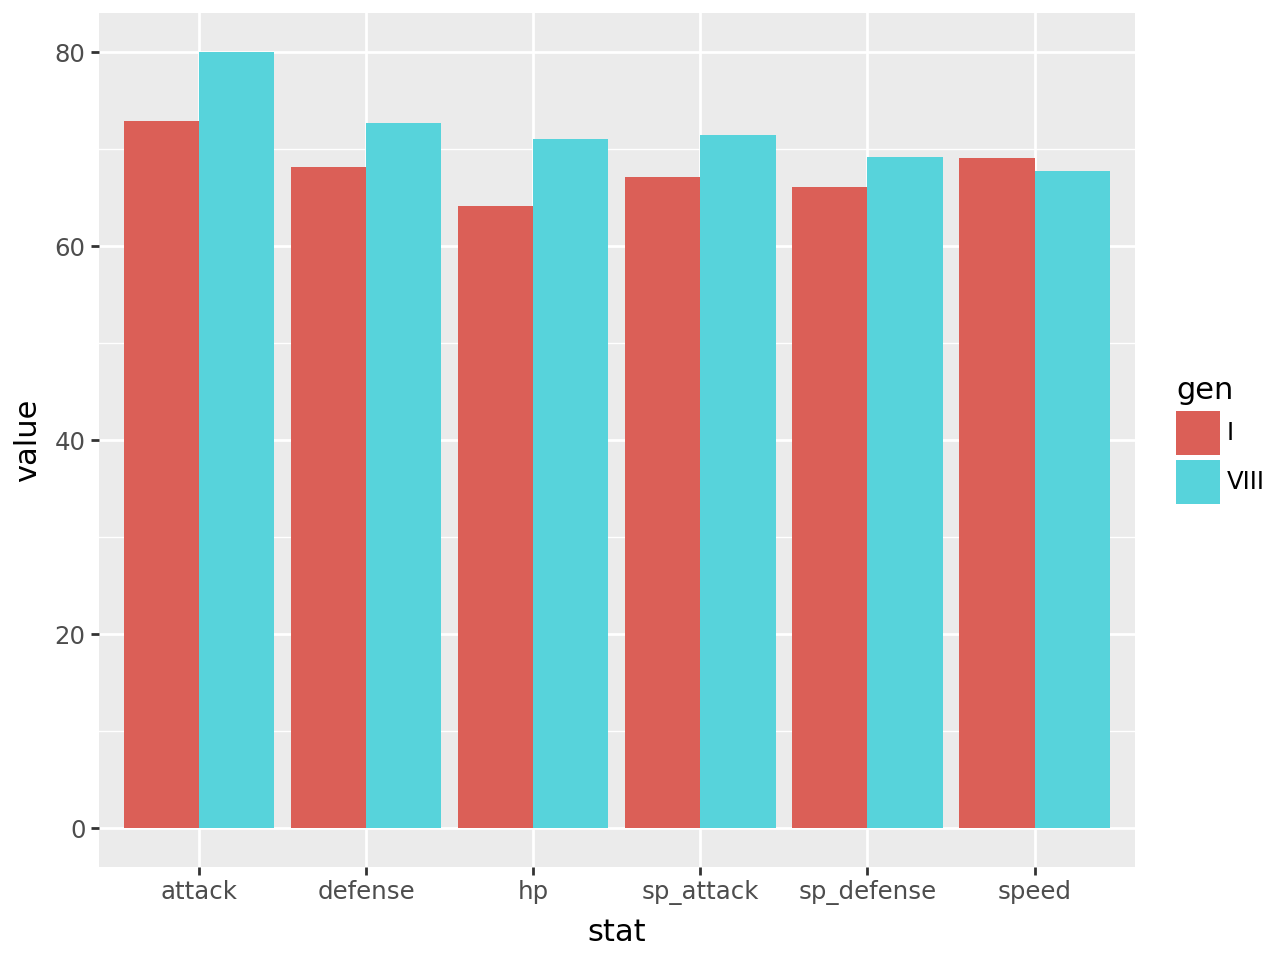

In [18]:
# Your code here

df_mean = (
    df_melt
    .groupby(["gen", "stat"], as_index=False)
    .mean()
)

df_mean.head()

ggplot(df_mean, aes(x = 'stat', y = 'value', fill = 'gen')) + \
    geom_bar(stat="identity", position="dodge")